# TELCO Churn Data

## Acquire:

In [18]:
import acquire as aq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
telco_df = aq.get_telco_data() #Acquire function brings in TELCO data from SQL server

In [4]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


## Prepare Data

In [84]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [91]:
telco_df.isnull().sum() # No nulls

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [73]:
telco_df.total_charges = telco_df.total_charges.str.strip()

In [81]:
telco_df[telco_df.total_charges == ''] # need to replace total_charges with 0 for tenure 0

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


In [80]:
telco_df.total_charges = telco_df.total_charges.replace('', 0) 

In [86]:
telco_df.total_charges = telco_df.total_charges.astype('float64')

In [89]:
telco_df[telco_df.total_charges == 0]

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
85,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,0.0,No,Two year,DSL,Credit card (automatic)
156,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,0.0,No,Two year,DSL,Bank transfer (automatic)
236,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,0.0,No,Two year,DSL,Mailed check
255,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,0.0,No,Two year,DSL,Bank transfer (automatic)
339,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,0.0,No,Two year,DSL,Mailed check
5681,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,0.0,No,Two year,None,Mailed check
5717,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,0.0,No,Two year,None,Mailed check
5727,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,0.0,No,Two year,None,Mailed check
5798,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,0.0,No,Two year,None,Mailed check
6007,2,3,3,7644-OMVMY,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,19.85,0.0,No,Two year,None,Mailed check


In [87]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [88]:
telco_df.drop_duplicates() # No duplicates

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,9962-BFPDU,Female,0,Yes,Yes,1,Yes,...,No internet service,No internet service,No internet service,No,20.05,20.05,No,Month-to-month,None,Mailed check
7039,2,3,1,9967-ATRFS,Female,0,No,No,19,Yes,...,No internet service,No internet service,No internet service,No,19.90,367.55,No,Month-to-month,None,Mailed check
7040,4,3,1,9970-QBCDA,Female,0,No,No,6,Yes,...,No internet service,No internet service,No internet service,No,19.70,129.55,No,Month-to-month,None,Credit card (automatic)
7041,2,3,1,9975-SKRNR,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,No,18.90,18.90,No,Month-to-month,None,Mailed check


In [92]:
telco_df.describe() # Not really helpful at this point

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692,2279.734304
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047,2266.794470
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000,398.550000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000,1394.550000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000,3786.600000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000,8684.800000


In [93]:
telco_df.shape

(7043, 24)

array([[<AxesSubplot:title={'center':'payment_type_id'}>,
        <AxesSubplot:title={'center':'internet_service_type_id'}>,
        <AxesSubplot:title={'center':'contract_type_id'}>],
       [<AxesSubplot:title={'center':'senior_citizen'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'monthly_charges'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

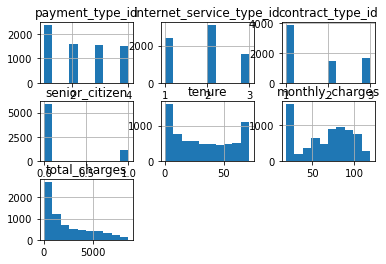

In [94]:
telco_df.hist()

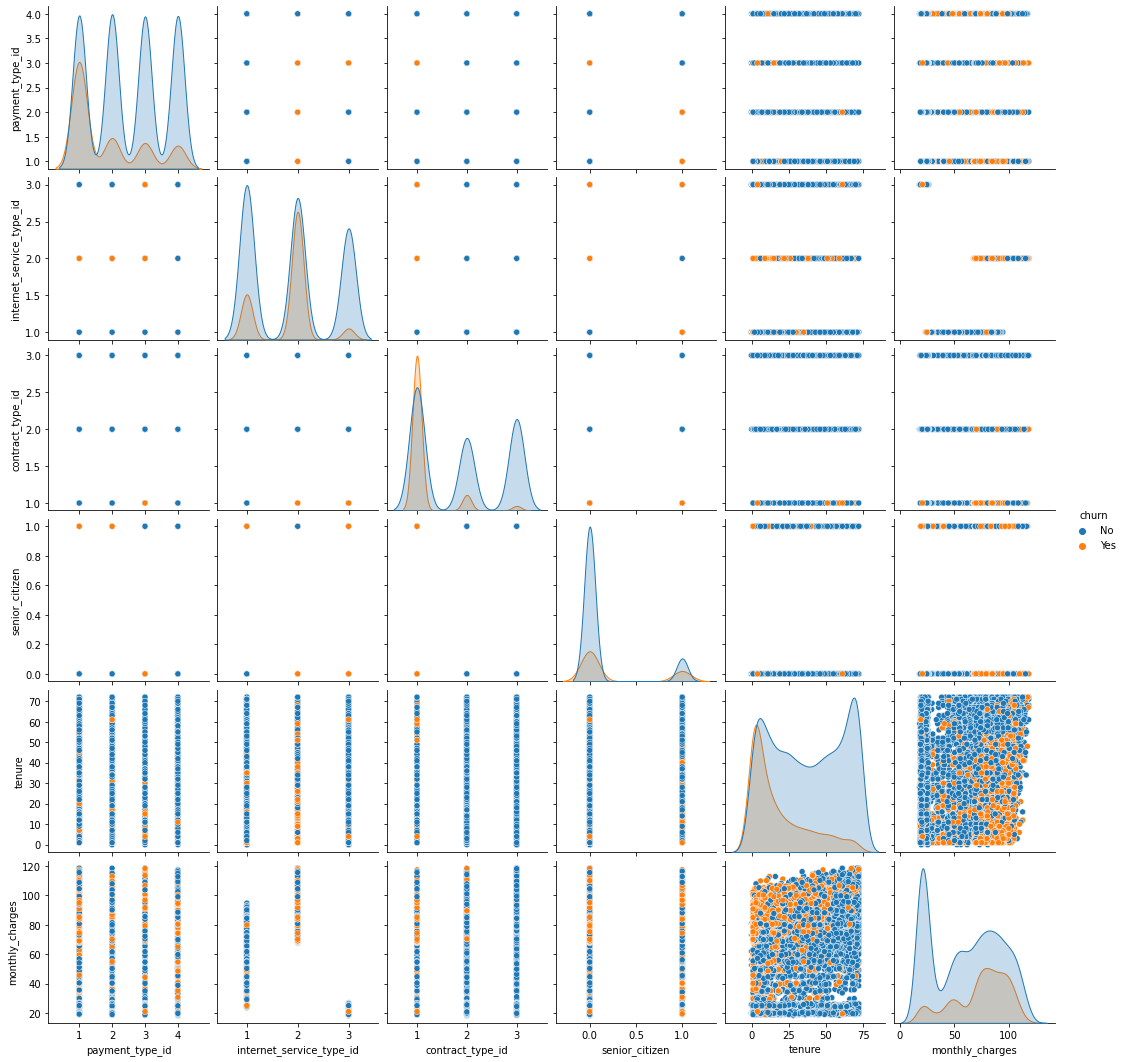

In [59]:
sns.pairplot(telco_df, hue='churn')

In [95]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic)


In [97]:
telco_df.senior_citizen.value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [ ]:
columns_to_drop = [payment_type_id, ]